## Team Member :
Shridevi Reddy (801100596)

# WildFire (Protugal) prediction using SVR, Random Forest, Gradient Boost and Deep NN
This dataset is public available for research. 

Available at : https://archive.ics.uci.edu/ml/datasets/forest+fires

As we will see this is a extremely hard regression problem with clear outliers which cannot be predicted using any reasonable method. Four methods: (a) support vector regression, (b) random forest, (c) Gradient Boost, (d) 3-layer dense neural network will be tried to show the relative performance.

This file consists of basic EDA and preprocessing of wildfire dataset.

### CRISP DM PROCESS:
DATA UNDERSTANDING : Getting to know dataset, EDA and pre-processing is part of data understanding.

### Import required libraries and Read the Forest Fire dataset

In [1]:
#Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split

df=pd.read_csv('forestfires.csv') #importing dataset
df.head() #display first five rows

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Basic info and statistics

Next two cell is used to get necessary information of dataset.
info() is used to get number of entries and data type of column
describe() is used to get statistics of data like min, mode, std and all other statistics

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [3]:
df.describe() #get basic statistics of data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Analyzing above table, we can conclude that data has lot of outliers. We will try to pre-process dataset to remove outliers in pre-processing step.

We will check for null values if any. 

In [4]:
df.isnull().sum() #check null values if any

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

As we can see from results, there's zero null values.

Next section is exploratory data analysis of dataset.

## EXPLORATORY DATA ANALYSIS 

In this section we will perform visual analysis of given dataset to get basic understanding of dataset and trends in dataset.

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8247E0C88>,
      dtype=object)

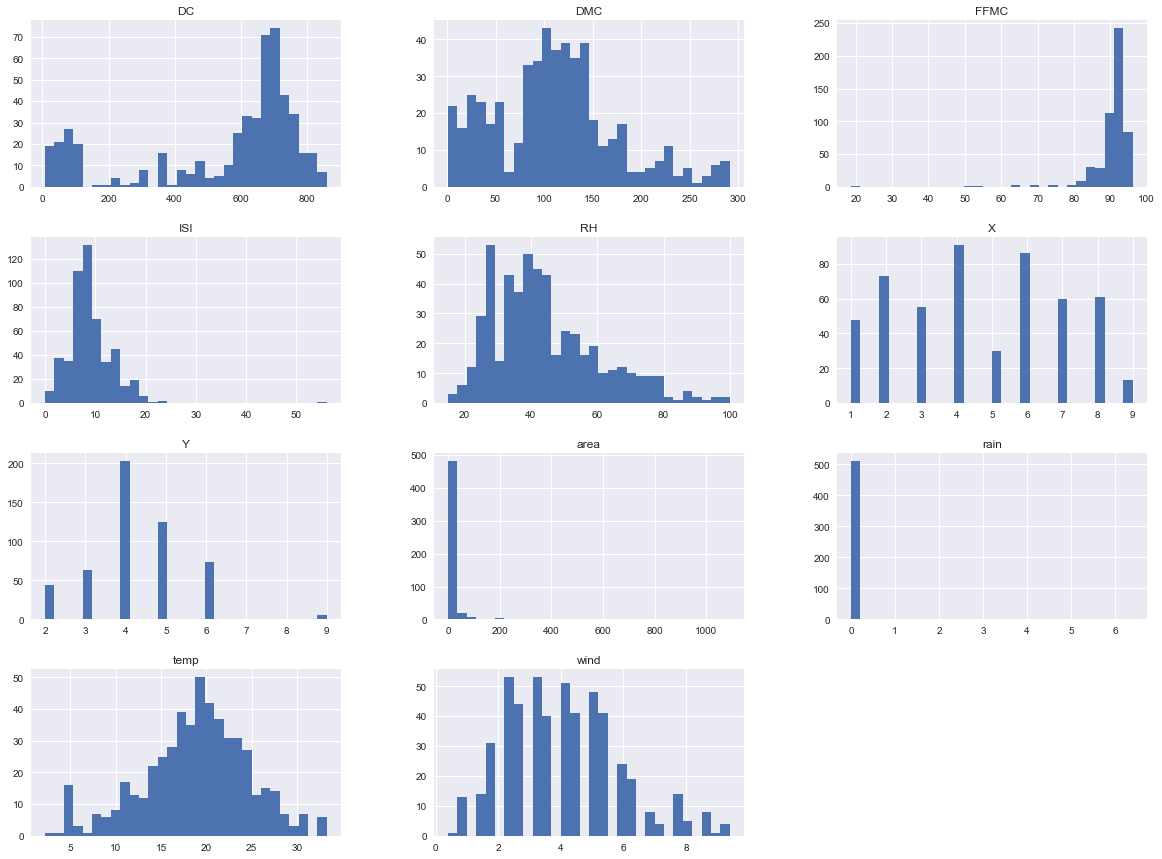

In [5]:
#we will plot histogram for numerical values to check distribution of data
import seaborn as sns
plt.style.use('seaborn')
df.hist(bins=30, figsize=(20,15))

We can see that, with outliers , skewness is also there in dataset.

### Scatterplot

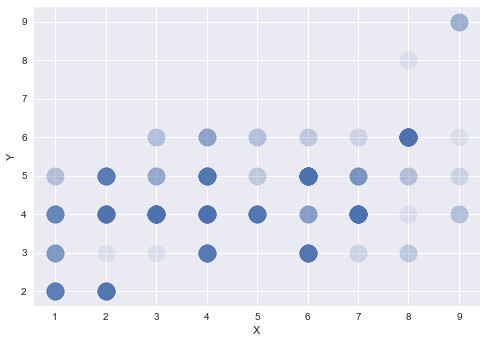

In [6]:
df.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300) #scatterplot between X and Y co-ordinates

Outlier for 8 and 9 of X-coordinate.

### Co-relation matrix and Heatmap

In [7]:
df_corr_matrix = df.corr() #finding co-relation 
df_corr_matrix['area'].sort_values(ascending=False) #with respect to area

area    1.000000
temp    0.097844
DMC     0.072994
X       0.063385
DC      0.049383
Y       0.044873
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

From co-relation matrix, we can see that rain and RH have negative co-relation with respect to burned area, which is fact that more rain or RH , less fire and burned area.

Visual representation of co-relation matrix.

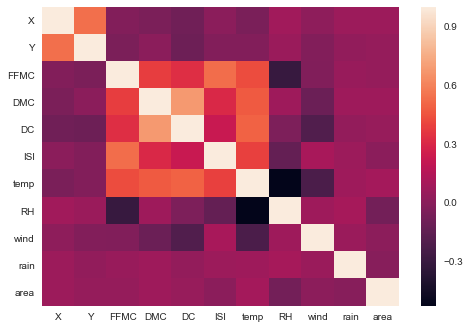

In [8]:
ax=sns.heatmap(df_corr_matrix)

Let's get insight for categorical data i.e month and day column.

### Crosstab and stacked bar chart

In [9]:
pd.crosstab(df.month, df.day) #crosstab is used for comparing two categorical data

day,fri,mon,sat,sun,thu,tue,wed
month,,,,,,,
apr,1,1,1,3,2,0,1
aug,21,15,29,40,26,28,25
dec,1,4,0,1,1,1,1
feb,5,3,4,4,1,2,1
jan,0,0,1,1,0,0,0
jul,3,4,8,5,3,6,3
jun,3,3,2,4,2,0,3
mar,11,12,10,7,5,5,4
may,1,0,1,0,0,0,0


From cross-table , we can conclude following points:-
    1. August and September month has high number of incidence every day.
    2. It is followed by March
    3. November has least number of incidence.
    4. June and July has same range of incidence.

To get more quick understanding , let's plot stacked bar chart of crosstab.

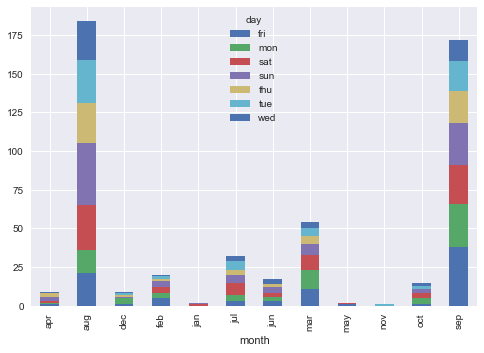

In [10]:
ax=pd.crosstab(df.month, df.day)
ax.plot(kind='bar',stacked=True)
plt.show()

### Bubble Chart

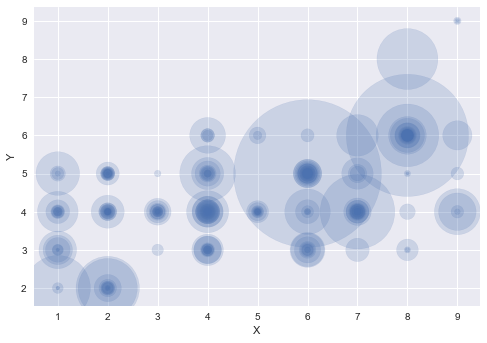

In [11]:
df.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*df['area']) #bubble chart 

Bubble chart adds impact of third variable on scatter plot. Above, we have scatter plot between X and Y . Third parameter here is area. We have multiplied area with 20, so that all variables are in same range.

# PRE-PROCESSING

### Logarithmic Transformation and visualization

In [12]:
df['Log-area']=np.log10(df['area']+1)

Values in area column are mostly zero. This may lead to overfitting of data. To resolve this problem, we have done logarithmic transformation on area i.e. our output or dependent variable.

Next, we will compare transformed area column with statistics of another column.

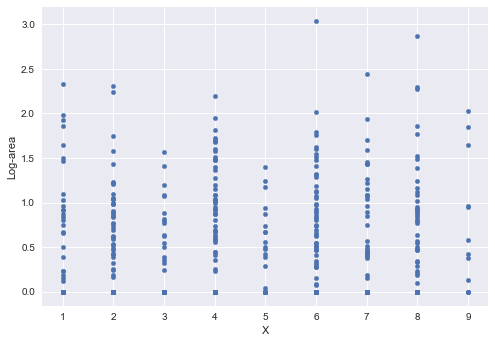

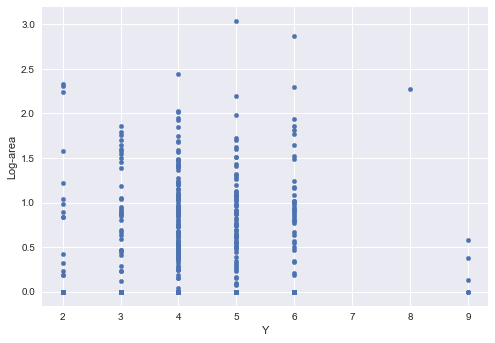

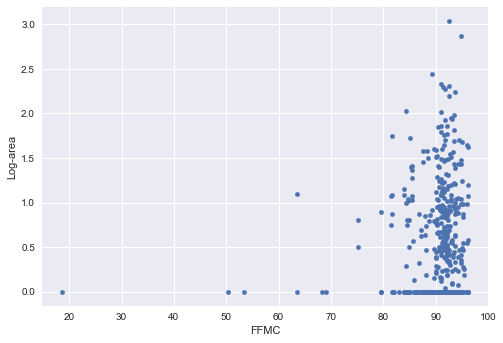

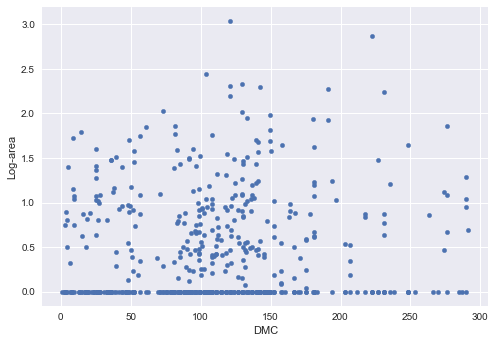

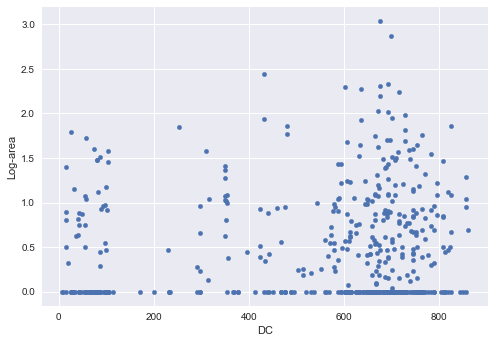

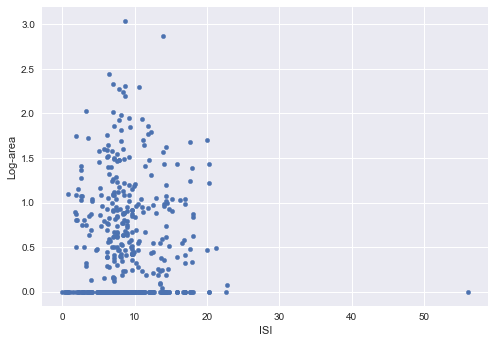

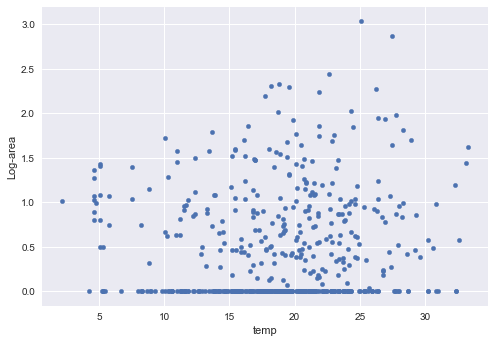

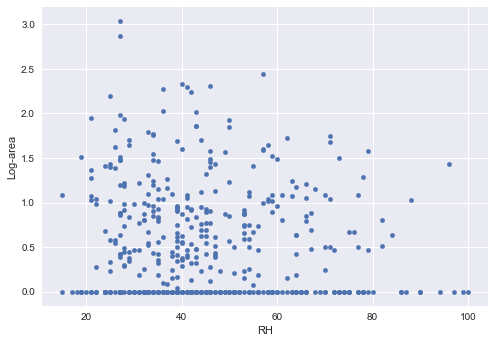

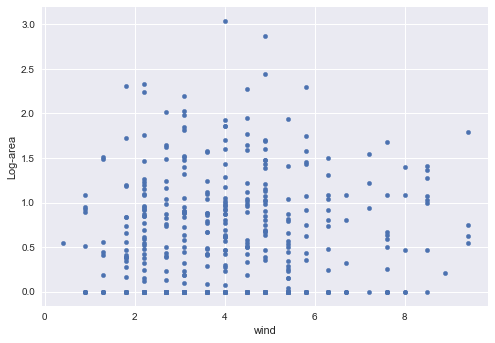

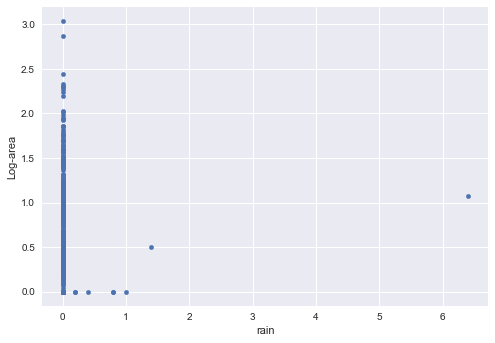

In [13]:
for i in df.describe().columns[:-2]: #for loop to compare log-area and other column
    df.plot.scatter(i,'Log-area',grid=True)

We will do some visual analysis for comparing log-area with categorical data i.e month and day.

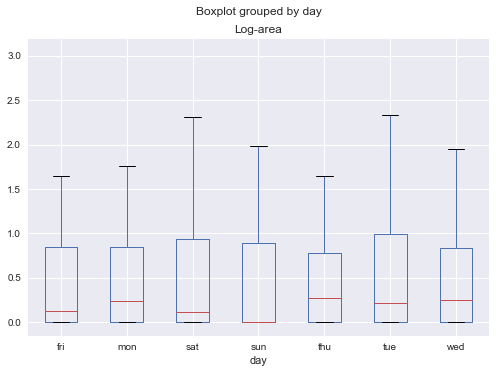

In [14]:
df.boxplot(column='Log-area',by='day')

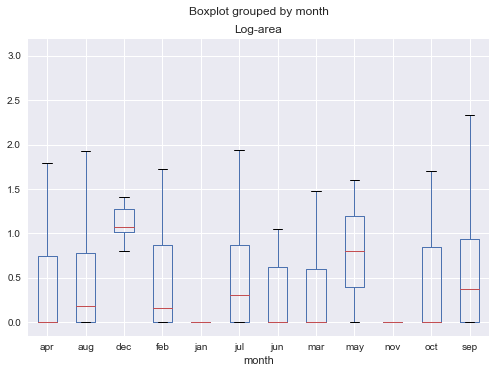

In [15]:
df.boxplot(column='Log-area',by='month')

After applying logarithmic transformation on target column, target values are more stable.

### Encoding categorical data

Next step is to encode categorical data. Categorical data can't be used in modeling if it's in object dtype . We need to convert categorical data into numerical form.

In [16]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
enc.fit(df['month'])
df['encoded_month']=enc.transform(df['month'])

In [17]:
enc.fit(df['day'])
df['encoded_day']=enc.transform(df['day'])

In [18]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,encoded_month,encoded_day
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10,5
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10,2
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7,3


### Train Test split

Using train-test split partition data into training set and test set. Test set size is 0.4 (i.e 40% of total dataset)

In [19]:
test_size=0.4
X_data=df.drop(['area','Log-area','month','day'],axis=1)
y_data=df['Log-area']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

### CRISP DM Process
### Modelling & Evaluation: 
Application of model and ROC curve used for evaluation of model.

## Model Outline:-
In next part, we will apply SVR, Random forest , Gradient boosting and Deep Neural Network on our processed data. 
We will try to predict burned area. After application of different model we will compare accuracy of all applied models and analyze their components. 

## Model Description :-

1. Support Vector Regressor:- In machine learning, support-vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

2. Random Forest :- Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set. 

3. Gradient Boosting :- Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

4. Deep Neural Network :- Deep learning (also known as deep structured learning or hierarchical learning) is part of a broader family of machine learning methods based on artificial neural networks. Learning can be supervised, semi-supervised or unsupervised. Deep learning is a class of machine learning algorithms that uses multiple layers to progressively extract higher level features from the raw input. 

# Next: 
Application of model on processed data and comparing accuracy to find best model.

Below code is for visualizing rec curve

In [21]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

In [22]:
tol_max=20

### Support Vector Regressor

In [23]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [24]:
scaler = StandardScaler()

In [25]:
# Parameter grid for the Grid Search
param_grid = {'C': [0.01,0.1,1, 10], 'epsilon': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [29]:
y_train=y_train.values.reshape(-1,1)
grid_SVR = GridSearchCV(SVR(),param_grid,refit=True,verbose=0,cv=5)
grid_SVR.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))

C:\Users\shrid\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shrid\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shrid\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shrid\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'epsilon': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
print("Best parameters obtained by Grid Search:",grid_SVR.best_params_)

Best parameters obtained by Grid Search: {'C': 0.1, 'epsilon': 1, 'kernel': 'rbf'}


In [31]:
a=grid_SVR.predict(X_test)
print("RMSE for Support Vector Regression:",np.sqrt(np.mean((y_test-a)**2)))

RMSE for Support Vector Regression: 0.6689764236426855


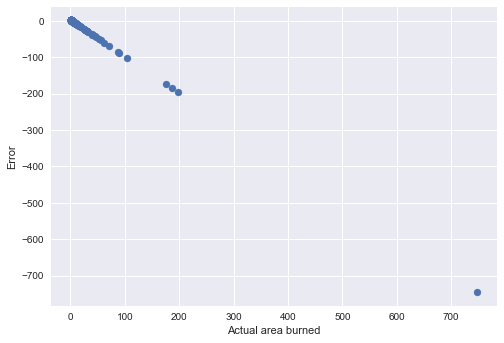

In [32]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(a)-10**(y_test))

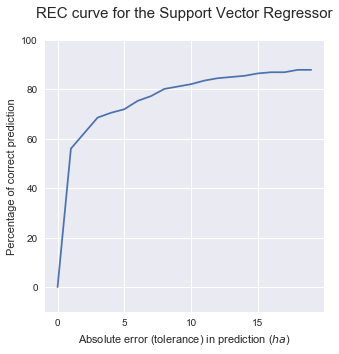

In [33]:
rec_SVR=[]
for i in range(tol_max):
    rec_SVR.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Support Vector Regressor\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_SVR)

## Decision Tree regressor 

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
tree_model = DecisionTreeRegressor(max_depth=10,criterion='mae')
tree_model.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))

DecisionTreeRegressor(criterion='mae', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [38]:
a=tree_model.predict(X_test)
print("RMSE for Decision Tree:",np.sqrt(np.mean((y_test-a)**2)))

RMSE for Decision Tree: 1.8338720313160124


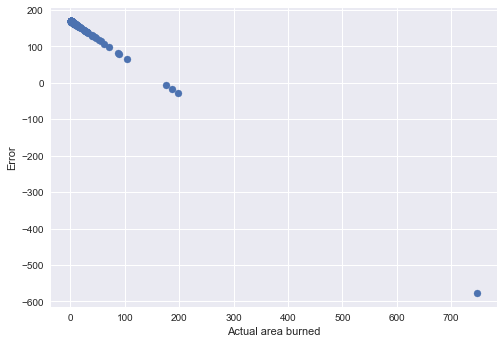

In [39]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(a)-10**(y_test))

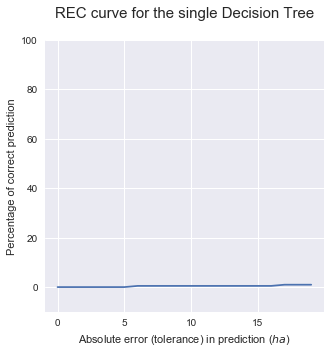

In [40]:
rec_DT=[]
for i in range(tol_max):
    rec_DT.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the single Decision Tree\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_DT)

## Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
param_grid = {'max_depth': [5,10,15,20,50], 'max_leaf_nodes': [2,5,10], 'min_samples_leaf': [2,5,10],
             'min_samples_split':[2,5,10]}
grid_RF = GridSearchCV(RandomForestRegressor(),param_grid,refit=True,verbose=0,cv=5)
grid_RF.fit(X_train,y_train)

C:\Users\shrid\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shrid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shrid\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shrid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20, 50

In [43]:
print("Best parameters obtained by Grid Search:",grid_RF.best_params_)

Best parameters obtained by Grid Search: {'max_depth': 15, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [44]:
a=grid_RF.predict(X_test)
rmse_rf=np.sqrt(np.mean((y_test-a)**2))
print("RMSE for Random Forest:",rmse_rf)

RMSE for Random Forest: 0.6294195704484848


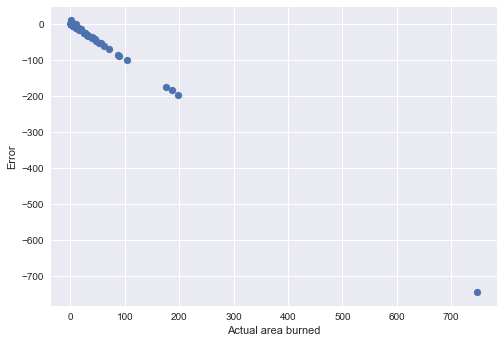

In [45]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(a)-10**(y_test))

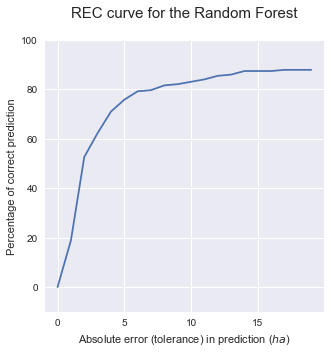

In [46]:
rec_RF=[]
for i in range(tol_max):
    rec_RF.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Random Forest\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_RF)

## Deep Neural Network (Deep NN)

In [47]:
from keras.models import Sequential
import keras.optimizers as opti
from keras.layers import Dense, Activation,Dropout

Using TensorFlow backend.


In [48]:
model = Sequential()
model.add(Dense(100, input_dim=12))
model.add(Activation('selu'))
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(Dropout(0.3))
model.add(Activation('selu'))
model.add(Dense(50))
model.add(Activation('elu'))
model.add(Dense(1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1300      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_2 (Activat

In [49]:
learning_rate=0.001
optimizer = opti.RMSprop(lr=learning_rate)
model.compile(optimizer=optimizer,loss='mse')

In [50]:
data=X_train
target = y_train
model.fit(data, target, epochs=100, batch_size=10,verbose=0)

Instructions for updating:
Use tf.cast instead.


In [51]:
a=model.predict(X_test)
print("RMSE for Deep Network:",np.sqrt(np.mean((y_test-a.reshape(a.size,))**2)))

RMSE for Deep Network: 0.6311583727414094


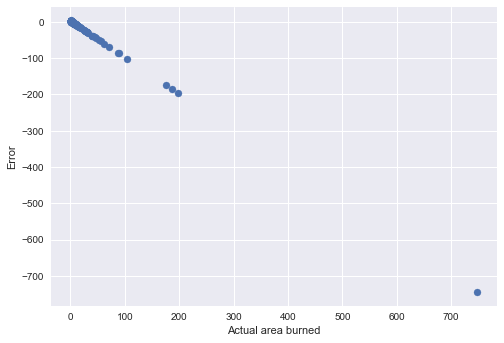

In [52]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(a.reshape(a.size,))-10**(y_test))

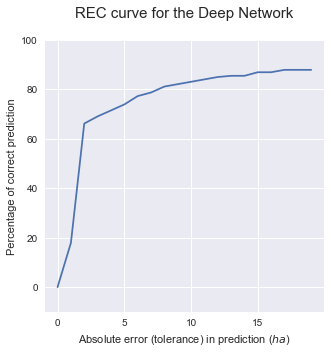

In [53]:
rec_NN=[]
for i in range(tol_max):
    rec_NN.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Deep Network\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_NN)

## Conclusion:-

Data used was mostly clean but highly skewed. For skewness , pre-processing methods like normalization was used. Different algorithm like Decision tree, Random Forest , Deep NN, Support Vector Regressor was tested on dataset. Deep NN started to learn fast compared to other algorithm and it has high accuracy rate.    

## Future work: 

Given dataset and modelling can be used for diaster management. Dataset can be extended on large scale level by adding more data and variables. For example : Satellite images with other parameters can be added to given dataset.  This will help in more accurate prediction of burnt wildfire area and improve given model. 

## Instruction:-

Please go through entire code and try to understand concept. Understanding concept and logic behind code is important.
Also try to implement, learnt concepts on different datasets.